## Observations and Insights 

In [ ]:
#OBSERVATIONS
#1. Capomulin and Ramicane look to be the most promising treatments, as distributions of tumor volume fell below the range
# of values seen in Ceftamin and Infbutinol (see Boxplot)
#2. These 2 regimens show the lowest mean, median, standard deviation and variance in tumor volumes as well (summary stats)
#3. These 2 regimens also had the highest number of mice per timepoint (see bar chart)

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
merge_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [3]:
# Checking the number of mice in the DataFrame.
unique_mice = len(merge_df['Mouse ID'].unique())
unique_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_merge_df = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'], keep = False)]
duplicate_merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# ASSUMPTION:  Keep the first of the duplicated rows, delete others
clean_df = merge_df.drop_duplicates(subset = ['Mouse ID', 'Timepoint'], keep = False, inplace = False)
cleaned_df = clean_df.loc[clean_df["Mouse ID"] != "g989"]

In [7]:
# Checking the number of mice in the clean DataFrame.
cleaned_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,12.757979,25.660106,19.606383,50.435293,1.025000
std,7.181998,3.935064,14.094238,8.914197,1.139971
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.933454,1.000000
75%,19.250000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [8]:
New_unique_mice = len(cleaned_df['Mouse ID'].unique())
New_unique_mice

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean_tumorvol = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumorvol = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var_tumorvol = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_tumorvol = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_tumorvol = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

tumor_table = pd.DataFrame({'Mean': mean_tumorvol, 'Median': median_tumorvol, 'Variance': var_tumorvol,
                           'Standard Deviation': std_tumorvol, 'Standard Error of Mean': sem_tumorvol})

tumor_table

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen



## Bar Plots

Text(0, 0.5, 'Count of Mice Measurements')

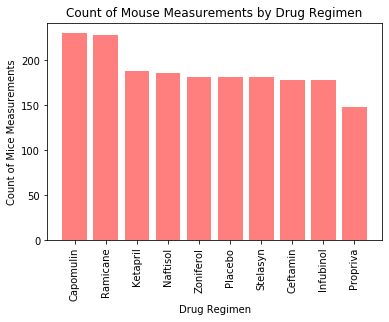

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
#Generate a dataframe to use for the plot
regimen_group = cleaned_df.groupby('Drug Regimen')['Mouse ID'].count()
regimen_group_df = pd.DataFrame(regimen_group).reset_index()
regimen_group_df = regimen_group_df.sort_values("Mouse ID", ascending=False)

# Set x axis and tick locations
x_axis = np.arange(len(regimen_group_df))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, regimen_group_df["Mouse ID"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, regimen_group_df["Drug Regimen"], rotation="vertical")

# Set a Title and labels
plt.title("Count of Mouse Measurements by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Mice Measurements")

Text(0.5, 1.0, 'Count of Mouse Measurements by Drug Regimen')

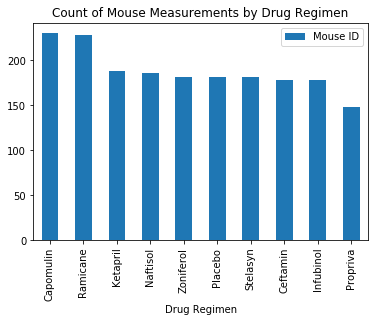

In [12]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the
# Set a title for the chart study using pandas.
regimen_group_df.plot(x = 'Drug Regimen', y = 'Mouse ID', kind="bar")
plt.title("Count of Mouse Measurements by Drug Regimen")

## Pie Plots

Text(0, 0.5, 'Female')

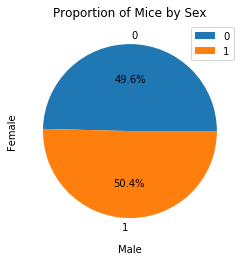

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
unique_mice = cleaned_df.groupby("Sex")["Mouse ID"].nunique()
unique_mice_df = pd.DataFrame(unique_mice).reset_index()

plot = unique_mice_df.plot.pie(y='Mouse ID', autopct="%1.1f%%")

# Set a Title and labels
plt.title("Proportion of Mice by Sex")
plt.xlabel("Male")
plt.ylabel("Female")

Text(0.5, 1.0, 'Proportion of Mice by Sex')

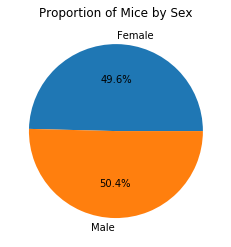

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(unique_mice_df['Mouse ID'], labels=unique_mice_df['Sex'], autopct="%1.1f%%")
plt.title("Proportion of Mice by Sex")

In [15]:
unique_mice_df

,Sex,Mouse ID
0,Female,123
1,Male,125


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Data needed:  Drug Regimen = Capomulin, Ramicane, Infubinol, and Ceftamin.  Final Tumor Volume defined as Timepoint = 45
finalfour_df = cleaned_df[(cleaned_df['Timepoint'] == 45) & (cleaned_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']))]
finalfour_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [24]:
#Final tumor volume of mice in each of the 4 treatment regimens found by totaling tumor volume for each regimen
tumor_vol = finalfour_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sum()
tumor_vol

Drug Regimen
Capomulin    760.958390
Ceftamin     833.721477
Infubinol    591.800061
Ramicane     699.111896
Name: Tumor Volume (mm3), dtype: float64

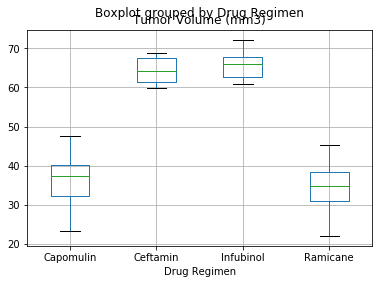

In [30]:
Boxplot

finalfour_df.boxplot(by="Drug Regimen", column ="Tumor Volume (mm3)")

In [85]:
#Create lists of tumor volume for each of the 4 regimens:  Capomulin', 'Ramicane', 'Infubinol','Ceftamin

Capomulinlis = []
Ramicanelis = []
Infubinollis = []
Ceftaminlis = []

finalfour_df.reset_index(inplace=True, drop=True)

for index, row in finalfour_df.iterrows():
    if row['Drug Regimen'] == "Capomulin":
        cap = row['Tumor Volume (mm3)']
        Capomulinlis.append(cap)
    elif row['Drug Regimen'] == "Ramicane":
        ram = row['Tumor Volume (mm3)']
        Ramicanelis.append(ram)
    elif row['Drug Regimen'] == "Infubinol":
        inf = row['Tumor Volume (mm3)']
        Infubinollis.append(inf)
    elif row['Drug Regimen'] == "Ceftamin":
        cef = row['Tumor Volume (mm3)']
        Ceftaminlis.append(cef)

In [96]:
# For each treatment regimen, calculate the IQR and quantitatively determine if there are any potential outliers.
#Capomulinlis
#Create a dataframe of the above lists to enable use of the quantiles function

captumorvol_df = pd.DataFrame({'Capomulin': Capomulinlis})
quartiles = captumorvol_df['Capomulin'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
capoutliers = []
for index, row in captumorvol_df.iterrows():
    if row['Capomulin'] > upper_bound or row['Capomulin'] < lower_bound:
        out = row['Capomulin']
        capoutliers.append(out)
capoutliers

[]

In [99]:
ramicanelis_df = pd.DataFrame({'Ramicane': Ramicanelis})
quartiles = ramicanelis_df['Ramicane'].quantile([.25,.5,.75])
lowerq1 = quartiles[0.25]
upperq1 = quartiles[0.75]
iqr1 = upperq1-lowerq1
lower_bound1 = lowerq1 - (1.5*iqr1)
upper_bound1 = upperq1 + (1.5*iqr1)
ramoutliers = []
for index, row in ramicanelis_df.iterrows():
    if row['Ramicane'] > upper_bound1 or row['Ramicane'] < lower_bound1:
        out1 = row['Ramicane']
        ramoutliers.append(out1)
ramoutliers

[]

In [101]:
infubinollis_df = pd.DataFrame({'Infubinol': Infubinollis})
quartiles = infubinollis_df['Infubinol'].quantile([.25,.5,.75])
lowerq2 = quartiles[0.25]
upperq2 = quartiles[0.75]
iqr2 = upperq2-lowerq2
lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
infoutliers = []
for index, row in infubinollis_df.iterrows():
    if row['Infubinol'] > upper_bound2 or row['Infubinol'] < lower_bound2:
        out2 = row['Infubinol']
        infoutliers.append(out2)
infoutliers

[]

In [107]:
ceftaminlis_df = pd.DataFrame({'Ceftamin': Ceftaminlis})
quartiles = ceftaminlis_df['Ceftamin'].quantile([.25,.5,.75])
lowerq3 = quartiles[0.25]
upperq3 = quartiles[0.75]
iqr3 = upperq3-lowerq3
lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
cefoutliers = []
for index, row in ceftaminlis_df.iterrows():
    if row['Ceftamin'] > upper_bound3 or row['Ceftamin'] < lower_bound3:
        out3 = row['Ceftamin']
        infoutliers.append(out3)
cefoutliers

[]

## Line and Scatter Plots

In [59]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# from table above, chose mouse ID s185
s185mouse = clean_df.loc[clean_df["Mouse ID"] == "s185"]
s185mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [63]:
# cut dataframe into 2 columns:  Timepoint and Tumor Volume (mm3)
s185mouseplot = s185mouse[['Timepoint', 'Tumor Volume (mm3)']]
s185mouseplot

,Timepoint,Tumor Volume (mm3)
10,0,45.000000
11,5,43.878496
12,10,37.614948
13,15,38.177232
14,20,36.866876
15,25,33.949940
16,30,32.959671
17,35,28.328531
18,40,25.472143
19,45,23.343598


Text(0, 0.5, 'Tumor Volume')

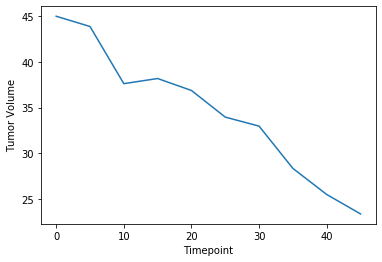

In [65]:
plt.plot(s185mouseplot['Timepoint'], s185mouseplot['Tumor Volume (mm3)'] )
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")


In [71]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# for each mouse id, get the weight and average tumor volume
capdf = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
grouped_capdf1 = capdf.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
grouped_capdf2 = capdf.groupby('Mouse ID')['Weight (g)'].mean()
capplot = pd.DataFrame({"Weight": grouped_capdf2, "Tumor Volume": grouped_capdf1 })
capplot.head()


,Weight,Tumor Volume
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344


Text(0, 0.5, 'Avg Tumor Volume')

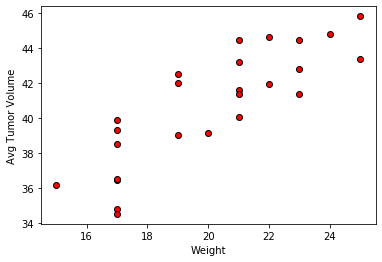

In [75]:
plt.scatter(capplot['Weight'], capplot['Tumor Volume'], marker="o", facecolors="red", edgecolors="black")
plt.xlabel("Weight")
plt.ylabel("Avg Tumor Volume")

## Correlation and Regression

In [76]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = capplot['Weight']
tumor_volume = capplot['Tumor Volume']
print(f"The correlation coefficient between Weight and Tumor Volume is {round(st.pearsonr(weight,tumor_volume)[0],2)}")

The correlation coefficient between Weight and Tumor Volume is 0.84


In [77]:
# Perform a linear regression on Weight versus Tumor Volume
#NOTE - HAD TO STOP WORKING ON THIS ASSIGNMENT AT THIS POINT... DID NOT FINISH THIS STEP
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(weight, tumor_volume)
# Create equation of line to calculate predicted violent crime rate
vc_fit = vc_slope * weight + vc_int
plt.scatter(capplot['Weight'], capplot['Tumor Volume'], marker="o", facecolors="red", edgecolors="black")
plt.plot(weight,vc_fit,"--")

NameError: name 'stats' is not defined